# Mass shootings - regression exercise

skeleton: https://github.com/fedhere/PUI2017_fb55/blob/master/HW5_fb55/Assignment3_instructionsUpdated.ipynb

# The data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import scipy as sp
from scipy import stats   
import matplotlib.mlab as mlab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/sebscho/PUI2017_ses515/master/HW5_ses515/World-firearms-murders-ownership%20(1).csv")
df1 = pd.read_csv("https://raw.githubusercontent.com/sebscho/PUI2017_ses515/master/HW5_ses515/API_SP.POP.TOTL_DS2_en_csv_v2.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/sebscho/PUI2017_ses515/master/HW5_ses515/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv")
df4 = pd.read_csv('https://raw.githubusercontent.com/sebscho/PUI2017_ses515/master/HW5_ses515/mass_shootings%20(1).csv')


In [4]:
df.rename(columns={'Country/Territory': 'Country', 'Average firearms per 100 people': 'Guns/100 inhabitants'}, inplace=True)
df.head(3)

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Guns/100 inhabitants,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0


In [5]:
df1 = df1[['Country Name', '2012']]
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
df1.rename(columns={'Country Name': 'Country', '2012': 'Pop'}, inplace=True)
df1.head(3)

,Country,Pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0


In [6]:
df2 = df2[['Country Name', '2012']]
df2.rename(columns={'Country Name': 'Country', '2012': 'GDP'}, inplace=True)
df2.head(2)

,Country,GDP
0,Aruba,NaN
1,Afghanistan,2.053654e+10


In [7]:
dat = pd.merge(df1, df, on='Country')
dat.head()

,Country,Pop,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Guns/100 inhabitants,Average total all civilian firearms
0,Angola,25096150.0,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
1,Albania,2900401.0,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
2,United Arab Emirates,8900453.0,AE,NaN,NaN,NaN,NaN,24.0,22.1,1000000.0
3,Argentina,42096739.0,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0
4,Armenia,2881922.0,AM,CTS,13.0,9.0,0.29,52.0,12.5,380000.0


In [8]:
data = pd.merge(dat, df2, on='Country')
data.head()

,Country,Pop,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Guns/100 inhabitants,Average total all civilian firearms,GDP
0,Angola,25096150.0,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0,1.153980e+11
1,Albania,2900401.0,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0,1.231978e+10
2,United Arab Emirates,8900453.0,AE,NaN,NaN,NaN,NaN,24.0,22.1,1000000.0,3.748180e+11
3,Argentina,42096739.0,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0,5.459820e+11
4,Armenia,2881922.0,AM,CTS,13.0,9.0,0.29,52.0,12.5,380000.0,1.061932e+10


In [9]:
data = pd.merge(data, df4, on='Country')
data.tail()

,Country,Pop,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Guns/100 inhabitants_x,Average total all civilian firearms,GDP,Guns/100 inhabitants_y,Number of mass shootings
17,New Zealand,4408100.0,NZ,CTS,13.5,7.0,0.16,22.0,22.6,925000.0,1.761930e+11,22.6,3
18,Poland,38063164.0,PL,CTS,7.1,35.0,0.09,142.0,1.3,510000.0,5.003440e+11,1.3,0
19,Portugal,10514844.0,PT,CTS,33.8,44.0,0.41,72.0,8.5,900000.0,2.163680e+11,8.5,1
20,Sweden,9519374.0,SE,CTS,33.9,37.0,0.41,10.0,31.6,2800000.0,5.438810e+11,31.6,2
21,United States,313998379.0,US,CTS,60.0,9146.0,2.97,1.0,88.8,270000000.0,1.615530e+13,88.8,78


In [10]:
data = data[['Country', 'Pop', 'GDP', 'Average total all civilian firearms', 'Number of homicides by firearm', 'Guns/100 inhabitants_x', 'Number of mass shootings']]
data.head()

,Country,Pop,GDP,Average total all civilian firearms,Number of homicides by firearm,Guns/100 inhabitants_x,Number of mass shootings
0,Australia,22728254.0,1.538190e+12,3050000.0,30.0,15.0,4
1,Austria,8429991.0,4.074520e+11,2500000.0,18.0,30.4,1
2,Canada,34750545.0,1.824290e+12,9950000.0,173.0,30.8,4
3,Switzerland,7996861.0,6.650540e+11,3400000.0,57.0,45.7,2
4,Germany,80425823.0,3.543980e+12,25000000.0,158.0,30.3,7


In [11]:
data.tail()

,Country,Pop,GDP,Average total all civilian firearms,Number of homicides by firearm,Guns/100 inhabitants_x,Number of mass shootings
17,New Zealand,4408100.0,1.761930e+11,925000.0,7.0,22.6,3
18,Poland,38063164.0,5.003440e+11,510000.0,35.0,1.3,0
19,Portugal,10514844.0,2.163680e+11,900000.0,44.0,8.5,1
20,Sweden,9519374.0,5.438810e+11,2800000.0,37.0,31.6,2
21,United States,313998379.0,1.615530e+13,270000000.0,9146.0,88.8,78


# Plot mass shooting vs gdp in absolute numbers, and per person

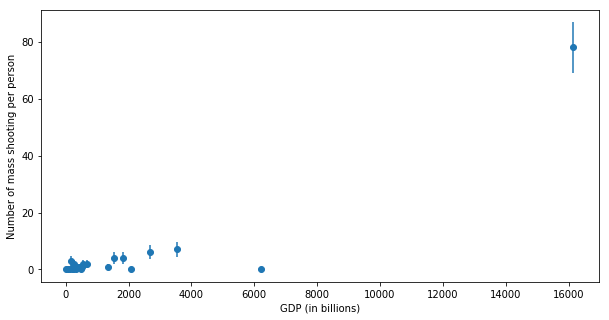

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [12]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(data.GDP / 1e9, data['Number of mass shootings'])
ax.errorbar(data.GDP / 1e9, data['Number of mass shootings'], 
            yerr = np.sqrt(data['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

# Find the average number of civilian fire arms per person


In [14]:
data['shootingspp'] = data["Number of mass shootings"] / data['Pop'] * 1000

# Plot the average number of homicide by firearm per person

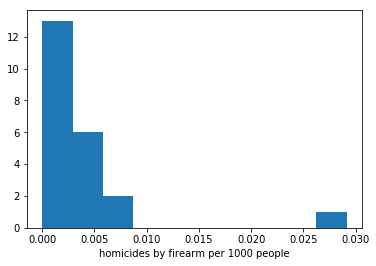

In [13]:
fig, ax = plt.subplots()
ax.hist(data['Number of homicides by firearm'] / data['Pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')

# GDP by average number of homicide by firearm per person

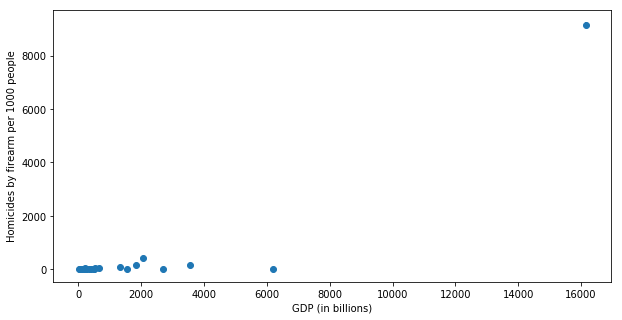

Number of homicides by firearms vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of homicides by firearms


In [15]:

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(data.GDP / 1e9, data['Number of homicides by firearm'])
ax.errorbar(data.GDP / 1e9, data['Number of homicides by firearm'], 
            yerr = np.sqrt(data['Number of homicides by firearm'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Homicides by firearm per 1000 people")
ax.set_ylim()
pl.show()

print ("Number of homicides by firearms vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of homicides by firearms")

## Plot the number of homicides by fire arm against the number of civilian firearms

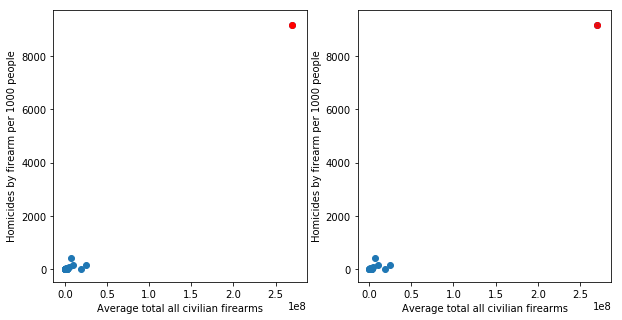

In [16]:
# first plot 
fig = pl.figure(figsize=(10,5)) 

ax2 = fig.add_subplot(121)
scatter = ax2.scatter(data['Average total all civilian firearms'], data['Number of homicides by firearm'])
scatterUSA = ax2.scatter(data['Average total all civilian firearms'][21], data['Number of homicides by firearm'][21], c='r')

ax2.set_xlabel("Average total all civilian firearms")
ax2.set_ylabel("Homicides by firearm per 1000 people")
ax2.set_ylim()

# second plot
ax1 = fig.add_subplot(122)
scatter = ax1.scatter(data['Average total all civilian firearms'], data['Number of homicides by firearm'])
scatterUSA = ax1.scatter(data['Average total all civilian firearms'][21], data['Number of homicides by firearm'][21], c='r')

ax1.errorbar(data['Average total all civilian firearms'], data['Number of homicides by firearm'],
        yerr = np.sqrt(data['Number of homicides by firearm'] * 1.0), fmt = '.')
#         xerr = np.sqrt(data['Average total all civilian firearms'] * 1.0), fmt = '.')
ax1.errorbar(data['Average total all civilian firearms'][21], data['Number of homicides by firearm'][21], 
        yerr = np.sqrt(data['Number of homicides by firearm'][21] * 1.0), fmt = '.', c='r')
#         xerr = np.sqrt(data['Average total all civilian firearms'] * 1.0), fmt = '.')
    
ax1.set_xlabel("Average total all civilian firearms")
ax1.set_ylabel("Homicides by firearm per 1000 people")
ax1.set_ylim()
pl.show()



## Plot the number of mass shootings against the number of civilian firearms

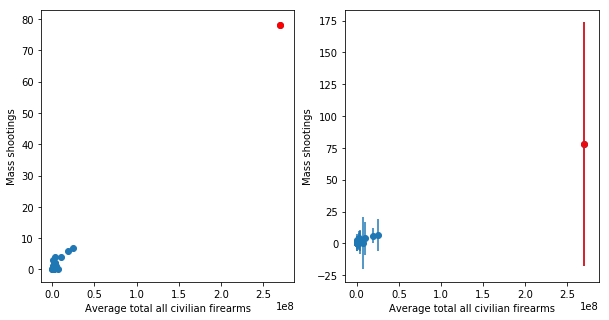

In [17]:
fig = pl.figure(figsize=(10,5)) 

# without error bands
ax = fig.add_subplot(121)
scatter = ax.scatter(data['Average total all civilian firearms'], data['Number of mass shootings'])
scatterUSA = ax.scatter(data['Average total all civilian firearms'][21], data['Number of mass shootings'][21], c='r')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()

# with error bands
ax1 = fig.add_subplot(122)
scatter = ax1.scatter(data['Average total all civilian firearms'], data['Number of mass shootings'])
scatterUSA = ax1.scatter(data['Average total all civilian firearms'][21], data['Number of mass shootings'][21], c='r')
ax1.errorbar(data['Average total all civilian firearms'], data['Number of mass shootings'], 
            yerr = np.sqrt(data['Number of homicides by firearm'] * 1.0), fmt = '.')
ax1.errorbar(data['Average total all civilian firearms'][21], data['Number of mass shootings'][21], 
            yerr = np.sqrt(data['Number of homicides by firearm'][21] * 1.0), fmt = '.', c='r')
ax1.set_xlabel("Average total all civilian firearms")
ax1.set_ylabel("Mass shootings")
ax1.set_ylim()
pl.show()

# Modeling
Fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

# Modeling with OLS

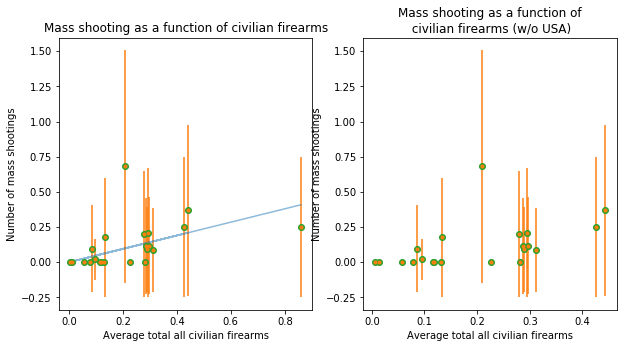

In [18]:
import statsmodels.api as sm
fig = pl.figure(figsize=(10,5)) 

# let's check it out, with error bars
ax = fig.add_subplot(121)
x = data['Average total all civilian firearms']/ data["Pop"]
y = data['Number of mass shootings'] * 1e6 / data["Pop"]
omodel = sm.OLS(y, x).fit()

pl.plot(x, omodel.fittedvalues, '-', alpha=.5)
pl.errorbar(x, y, yerr=np.abs(y)**0.5, fmt='.')
pl.plot(x,y, 'o')

pl.title('Mass shooting as a function of civilian firearms')
pl.xlabel('Average total all civilian firearms')
pl.ylabel('Number of mass shootings')

# take out USA, the outlier to see what's going on 
ax1 = fig.add_subplot(122)
x1 = data['Average total all civilian firearms'][:21]/ data["Pop"]
y1 = data['Number of mass shootings'][:21] * 1e6 / data["Pop"]
omodel_1 = sm.OLS(y1, x1).fit()

pl.plot(x1, omodel_1.fittedvalues, '-', alpha=.5)
pl.errorbar(x1, y1, yerr=np.abs(y1)**0.5, fmt='.')
pl.plot(x1, y1, 'o')

pl.title('Mass shooting as a function of' 
         '\n civilian firearms (w/o USA)')
pl.xlabel('Average total all civilian firearms')
pl.ylabel('Number of mass shootings')



In [19]:
omodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.31
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           0.000253
Time:                        14:04:48   Log-Likelihood:                 11.220
No. Observations:                  22   AIC:                            -20.44
Df Residuals:                      21   BIC:                            -19.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4748      0.108      4.394      0.000         0.250     0.700
==============================================================================
Omnibus:                       33.992   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.045
Skew:                           2.646   Prob(JB):                     3.41e-19
Kurtosis:                      11.048   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Modeling with WLS

In [20]:
omodel.resid

0     0.112278
1    -0.022180
2    -0.020839
3     0.048233
4    -0.060550
5    -0.055193
6    -0.024299
7     0.158941
8    -0.046010
9    -0.107467
10   -0.026802
11   -0.037264
12   -0.133237
13   -0.055821
14   -0.002641
15   -0.062597
16    0.066810
17    0.580935
18   -0.006362
19    0.054465
20    0.070444
21   -0.159853
dtype: float64

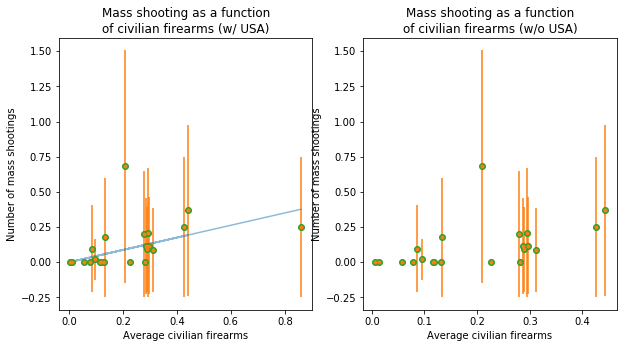

In [21]:
fig = pl.figure(figsize=(10,5)) 

# y error is the sqt of y
yerr = np.abs(y)**0.5

# endog and exog are parameters for wls and ols. weighting helps the fit. ols doesn't have a weight parameter.
# wmodel = sm.WLS(y, x, weights = 1/(yerr+1)).fit()

ax = fig.add_subplot(121)
wmodel = sm.WLS(y, x, weights = 1/(yerr+1)).fit()

pl.plot(x, wmodel.fittedvalues, '-', alpha=.5)
pl.errorbar(x, y, yerr=np.abs(y)**0.5, fmt='.')
pl.plot(x,y, 'o')

pl.title('Mass shooting as a function'  
         '\nof civilian firearms (w/ USA)')
pl.xlabel('Average civilian firearms')
pl.ylabel('Number of mass shootings')

# take out USA, the outlier to see what's going on 
ax1 = fig.add_subplot(122)
yerr1 = np.abs(y1)**0.05
wmodel_1 = sm.WLS(y1, x1, weights = 1/(yerr1+1)).fit()

pl.plot(x1, wmodel_1.fittedvalues, '-', alpha=.5)
pl.errorbar(x1, y1, yerr=np.abs(y1)**0.5, fmt='.')
pl.plot(x1, y1, 'o')

pl.title('Mass shooting as a function'
         '\nof civilian firearms (w/o USA)')
pl.xlabel('Average civilian firearms')
pl.ylabel('Number of mass shootings')


In [22]:
wmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.478
Model:                            WLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     19.25
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           0.000257
Time:                        14:04:52   Log-Likelihood:                 14.450
No. Observations:                  22   AIC:                            -26.90
Df Residuals:                      21   BIC:                            -25.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4379      0.100      4.388      0.000         0.230     0.645
==============================================================================
Omnibus:                       29.077   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.186
Skew:                           2.328   Prob(JB):                     2.32e-13
Kurtosis:                       9.465   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Seaborn

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


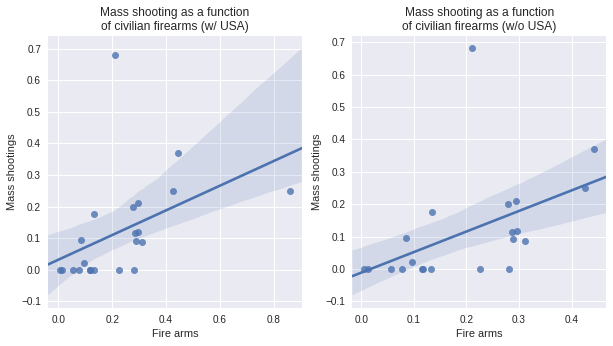

In [23]:
import seaborn  as sns

fig = pl.figure(figsize=(10,5)) 

ax = fig.add_subplot(121)
sns.regplot(x, y, data=data);
pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");
pl.title('Mass shooting as a function'
         '\nof civilian firearms (w/ USA)')

ax1 = fig.add_subplot(122)
sns.regplot(x1, y1, data=data);
pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");
pl.title('Mass shooting as a function'
         '\nof civilian firearms (w/o USA)')

# numpy.ployfit

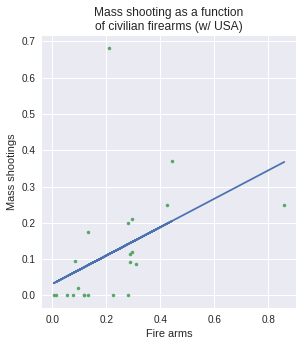

In [24]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html

# these two numbers are the coefficients - slope and intercept

fig = pl.figure(figsize=(10,5))

ax = fig.add_subplot(121)
func = np.polyfit(x, y, 1)
yfunc = func[0] * x + func[1]
pl.plot(x,yfunc, '-')
pl.plot(x,y, '.')
pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");
pl.title('Mass shooting as a function'
         '\nof civilian firearms (w/ USA)')

# # this line created by the coef is similar to our other models, but generated in a different way

# Use the stsatsmodels.gaphics package to plot the influence plot

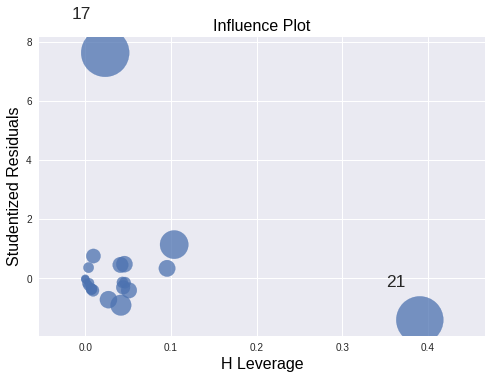

In [25]:
sm.graphics.influence_plot(omodel, alpha  = 0.05, criterion="cooks");
